In [1]:
import numpy as np
import os
import re
import shutil
from datetime import datetime, timedelta
import pandas as pd
from glob import glob
import xarray as xr
import netCDF4
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import time
import pickle

# calculate_variability_SMAP.py -> 
file_path = 'variability_calculations/variability_SMAP_0-40cells.pkl'
with open(file_path, 'rb') as file:
    results_all_dx = pickle.load(file)
    
file_path = 'variability_calculations/variability_SMAP_48-80cells.pkl'
with open(file_path, 'rb') as file:
    results_all_dx_2 = pickle.load(file)
    
results_all_dx.update(results_all_dx_2)


In [16]:

results = results_all_dx[6.25]
gamma = (results['yearly']['diff_sq'] / (2*results['yearly']['n_tot']))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.03326286310584297


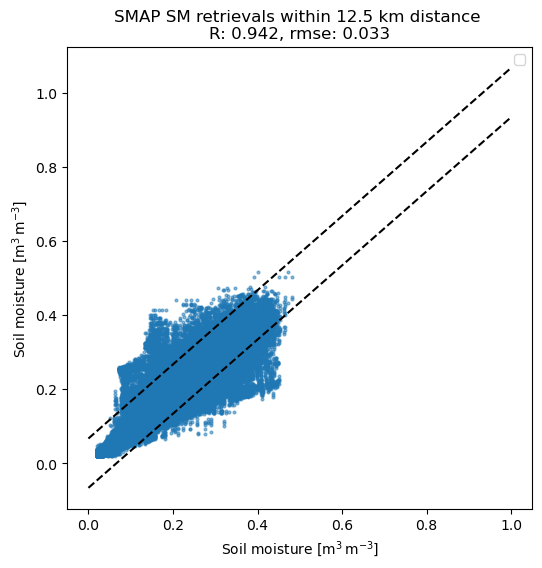

In [21]:
from scipy.stats import pearsonr
from itertools import chain
%matplotlib inline

x_all = np.array(list(chain(*results['monthly']['pairs_x'])))
y_all = np.array(list(chain(*results['monthly']['pairs_y'])))
R = pearsonr(x_all,y_all)[0]
rmse = np.sqrt(np.mean((x_all-y_all)**2))

sigma = np.sqrt(results['yearly']['diff_sq'] / (1*results['yearly']['n_tot']))
print(sigma)

cmap = plt.cm.tab20
plt.figure(figsize=(6,6))
for i in range(1):
    plt.plot(results['monthly']['pairs_x'][i],results['monthly']['pairs_y'][i],'o',markersize=2,color=cmap(i),alpha=.5)

    sigma_i = np.sqrt(results['monthly']['diff_sq'][i] / (1*results['monthly']['n_tot'][i]))
    # plt.plot([0,1],[0+2*sigma_i,1+2*sigma_i],'--',color=cmap(i),linewidth=1)
    # plt.plot([0,1],[0-2*sigma_i,1-2*sigma_i],'--',color=cmap(i),linewidth=1)

plt.plot([0,1],[0+2*sigma,1+2*sigma],'k--')
plt.plot([0,1],[0-2*sigma,1-2*sigma],'k--')

plt.legend(ncol=2)
plt.title('SMAP SM retrievals within 12.5 km distance \nR: %3.3f, rmse: %3.3f' % (R,rmse) )
plt.xlabel('Soil moisture [m$^3\,$m$^{-3}$]')
plt.ylabel('Soil moisture [m$^3\,$m$^{-3}$]')

plt.savefig('figures/var_smap_pairs.png')
plt.savefig('figures/var_smap_pairs.pdf')

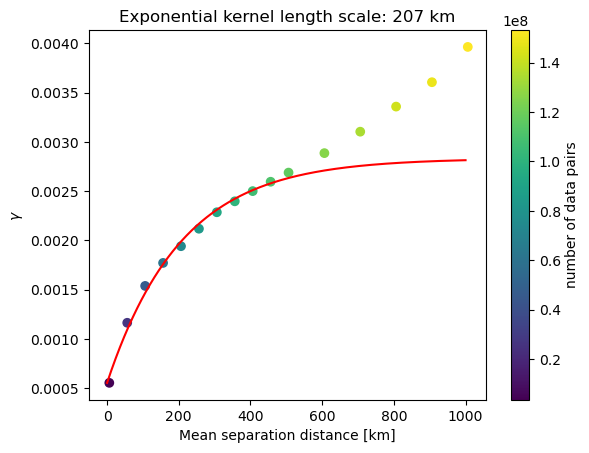

In [15]:
gamma = []
n_all = []
for key_ in results_all_dx.keys():
    results = results_all_dx[key_]
    if results['yearly']['n_tot'] > 0:
        gamma.append(results['yearly']['diff_sq'] / (2*results['yearly']['n_tot']))
    else:
        gamma.append(np.nan)
    n_all.append(results['yearly']['n_tot']/2)
    
x_all = np.array(list(results_all_dx.keys()))
y_all = gamma

from scipy.optimize import curve_fit
def var_exp(h,c,r,n):
    return c*(1-np.exp(-h/r)) + n

def var_gau(h,c,r,n):
    return c*(1-np.exp(-(h**2/r**2))) + n


res = curve_fit(var_exp, x_all[0:11],y_all[0:11], p0=(0.003,400,0.0005))
# res2 = curve_fit(var_gau, x_all[0:11],y_all[0:11], p0=(0.003,400,0.0005))

plt.figure()
plt.scatter(list(results_all_dx.keys()),gamma,c=n_all)
cbar=plt.colorbar()
plt.xlabel('Mean separation distance [km]')
plt.ylabel(r'$\gamma$')


x_ = np.linspace(0,1000,1000)
plt.plot(x_,var_exp(x_,res[0][0],res[0][1],res[0][2]),'r-')

cbar.set_label(r'number of data pairs',labelpad=3)
plt.title('Exponential kernel length scale: %i km' % res[0][1])
plt.savefig('figures/var_smap_gamma.png')
plt.savefig('figures/var_smap_gamma.pdf')

In [23]:
np.array(list(results_all_dx.keys()))[0:11]

array([  6.25,  56.25, 106.25, 156.25, 206.25, 256.25, 306.25, 356.25,
       406.25, 456.25, 506.25])

In [10]:
200/15

13.333333333333334

In [11]:
results_all_dx.keys()

dict_keys([6.25, 56.25, 106.25, 156.25, 206.25, 256.25, 306.25, 356.25, 406.25, 456.25, 506.25, 606.25, 706.25, 806.25, 906.25, 1006.25])